In [1]:
import pandas as pd
import numpy
from scipy import stats
import seaborn as sns

df = pd.read_csv(r"C:\Users\sesa640427\Downloads\diabetes column heading.txt", header=None, sep='.')
df[1] = df[1].str.replace('[$@#]|\(.*\)','',regex=True)
diabeticData = pd.read_csv(r"C:\Users\sesa640427\Downloads\diabetes_data_raw.csv", header=None, sep=' ')
diabeticData.drop([8,9], axis=1, inplace=True)
diabeticData.columns=df[1]
g = diabeticData
df[1] = df[1].str.replace('[$@#]|\(.*\)','',regex=True)
df

,0,1
0,0,Age
1,1,Number of times pregnant
2,2,Plasma glucose concentration
3,3,Diastolic blood pressure
4,4,Triceps skinfold thickness
5,5,2-Hour serum insulin
6,6,Body mass index
7,7,Diabetes pedigree function


In [2]:
df[1] = df[1].str.replace('[$@#]|\(.*\)','',regex=True)
df

,0,1
0,0,Age
1,1,Number of times pregnant
2,2,Plasma glucose concentration
3,3,Diastolic blood pressure
4,4,Triceps skinfold thickness
5,5,2-Hour serum insulin
6,6,Body mass index
7,7,Diabetes pedigree function


In [3]:
diabeticData = pd.read_csv(r"C:\Users\sesa640427\Downloads\diabetes_data_raw.csv", header=None, sep=' ')
g = diabeticData
g

,0,1,2,3,4,5,6,7,8,9
0,59,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87
1,48,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69
2,72,0.0,30.5,93.00,156.0,93.6,NaN,4.00,4.6728,85
3,24,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89
4,50,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,0
...,...,...,...,...,...,...,...,...,...,...
437,60,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93
438,47,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102
439,60,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95
440,36,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85


In [4]:
g.drop([8,9], axis=1, inplace=True)
g


,0,1,2,3,4,5,6,7
0,59,2.0,32.1,101.00,157.0,93.2,38.0,4.00
1,48,1.0,21.6,87.00,183.0,103.2,70.0,3.00
2,72,0.0,30.5,93.00,156.0,93.6,NaN,4.00
3,24,1.0,25.3,84.00,198.0,131.4,40.0,5.00
4,50,1.0,23.0,101.00,192.0,125.4,52.0,4.00
...,...,...,...,...,...,...,...,...
437,60,2.0,28.2,112.00,185.0,113.8,42.0,4.00
438,47,2.0,24.9,75.00,225.0,166.0,42.0,5.00
439,60,2.0,24.9,99.67,162.0,106.6,43.0,3.77
440,36,1.0,30.0,95.00,201.0,125.2,42.0,4.79


In [5]:
g.columns=df[1]

In [6]:
# g.columns= g.columns.str.replace('^ ','',regex=True)
g.columns = g.columns.str.strip()

In [7]:
g.isna().sum()

1
Age                             0
Number of times pregnant        1
Plasma glucose concentration    0
Diastolic blood pressure        1
Triceps skinfold thickness      1
2-Hour serum insulin            1
Body mass index                 1
Diabetes pedigree function      0
dtype: int64

In [8]:
odf = g.copy()
odf

1,Age,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skinfold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function
0,59,2.0,32.1,101.00,157.0,93.2,38.0,4.00
1,48,1.0,21.6,87.00,183.0,103.2,70.0,3.00
2,72,0.0,30.5,93.00,156.0,93.6,NaN,4.00
3,24,1.0,25.3,84.00,198.0,131.4,40.0,5.00
4,50,1.0,23.0,101.00,192.0,125.4,52.0,4.00
...,...,...,...,...,...,...,...,...
437,60,2.0,28.2,112.00,185.0,113.8,42.0,4.00
438,47,2.0,24.9,75.00,225.0,166.0,42.0,5.00
439,60,2.0,24.9,99.67,162.0,106.6,43.0,3.77
440,36,1.0,30.0,95.00,201.0,125.2,42.0,4.79


In [9]:
#1.1 remove all rows where special chars are there
g.dtypes

1
Age                               int64
Number of times pregnant        float64
Plasma glucose concentration    float64
Diastolic blood pressure        float64
Triceps skinfold thickness      float64
2-Hour serum insulin            float64
Body mass index                 float64
Diabetes pedigree function      float64
dtype: object

In [10]:
type(g.dtypes)

pandas.core.series.Series

In [11]:
list2 =[]
list1 = list(g.columns)
for x in list1:
    if g[x].dtypes == 'object':
        list2.append(x)

print(list2)

[]


In [12]:
import numpy as np
# replace with NAN
# drop NaN row
for i in list2:
    g[i].replace('[@$#]',np.nan, regex=True, inplace=True)
    g[i] = g[i].astype(float)
g.isna().sum()
g.dropna(inplace=True)
g.isna().sum()
g.dtypes
g

1,Age,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skinfold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function
0,59,2.0,32.1,101.00,157.0,93.2,38.0,4.00
1,48,1.0,21.6,87.00,183.0,103.2,70.0,3.00
3,24,1.0,25.3,84.00,198.0,131.4,40.0,5.00
4,50,1.0,23.0,101.00,192.0,125.4,52.0,4.00
5,23,1.0,22.6,89.00,139.0,64.8,61.0,2.00
...,...,...,...,...,...,...,...,...
437,60,2.0,28.2,112.00,185.0,113.8,42.0,4.00
438,47,2.0,24.9,75.00,225.0,166.0,42.0,5.00
439,60,2.0,24.9,99.67,162.0,106.6,43.0,3.77
440,36,1.0,30.0,95.00,201.0,125.2,42.0,4.79


In [13]:
#1.2.1 find the outliers in the dataframe. you can use 3 SD technique or IQR method or box plot 
# 3SD Method - least strict
'''
list1 = list(g.columns)
import numpy
print("shape of dataframe before removal of Outlier ", g.shape)
for x in list1:
    mean = g[x].mean()
    sd = numpy.std(g[x])
    upper_limit = mean + 3*sd
    lower_limt = mean - 3*sd
    new_df = pd.DataFrame()
    new_df = g[(g[x] >= upper_limit) | (g[x] <= lower_limt)]
    if len(new_df)>0:
        print("Outlier is there in the column ", x)
        g = g[(g[x] < upper_limit) & (g[x] > lower_limt)]
        print("Removed outlier from column ", x)
    else:
        print("There is no outlier in the column ", x)
    print("----------------------------------------------------------")
print("shape of dataframe after removal of Outlier ", g.shape)
'''


'\nlist1 = list(g.columns)\nimport numpy\nprint("shape of dataframe before removal of Outlier ", g.shape)\nfor x in list1:\n    mean = g[x].mean()\n    sd = numpy.std(g[x])\n    upper_limit = mean + 3*sd\n    lower_limt = mean - 3*sd\n    new_df = pd.DataFrame()\n    new_df = g[(g[x] >= upper_limit) | (g[x] <= lower_limt)]\n    if len(new_df)>0:\n        print("Outlier is there in the column ", x)\n        g = g[(g[x] < upper_limit) & (g[x] > lower_limt)]\n        print("Removed outlier from column ", x)\n    else:\n        print("There is no outlier in the column ", x)\n    print("----------------------------------------------------------")\nprint("shape of dataframe after removal of Outlier ", g.shape)\n'

In [14]:
#1.3 replace outliers with mean value of that column (you can use 3 Standard deviation technique, IQR method) to find outlier 
# IQR Method - the most strict methods to filter out outliers
'''
list1 = list(g.columns)
import numpy
print("shape of dataframe before removal of Outlier ", g.shape)
for x in list1:

    Q1 = g[x].quantile(0.25)
    Q3 = g[x].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - (1.5*IQR)
    upper_limit = Q3 + (1.5*IQR)
    
    new_df = pd.DataFrame()
    new_df = g[(g[x] >= upper_limit) | (g[x] <= lower_limt)]
    if len(new_df)>0:
        print("Outlier is there in the column ", x)
        g = g[(g[x] < upper_limit) & (g[x] > lower_limt)]
        print("Removed outlier from column ", x)
    else:
        print("There is no outlier in the column ", x)
    print("----------------------------------------------------------")

print("shape of dataframe after removal of Outlier ", g.shape)
'''

'\nlist1 = list(g.columns)\nimport numpy\nprint("shape of dataframe before removal of Outlier ", g.shape)\nfor x in list1:\n\n    Q1 = g[x].quantile(0.25)\n    Q3 = g[x].quantile(0.75)\n    IQR = Q3 - Q1\n\n    lower_limit = Q1 - (1.5*IQR)\n    upper_limit = Q3 + (1.5*IQR)\n    \n    new_df = pd.DataFrame()\n    new_df = g[(g[x] >= upper_limit) | (g[x] <= lower_limt)]\n    if len(new_df)>0:\n        print("Outlier is there in the column ", x)\n        g = g[(g[x] < upper_limit) & (g[x] > lower_limt)]\n        print("Removed outlier from column ", x)\n    else:\n        print("There is no outlier in the column ", x)\n    print("----------------------------------------------------------")\n\nprint("shape of dataframe after removal of Outlier ", g.shape)\n'

In [15]:
# Z-Score Method
# 2nd best next to IQR
df2 = g.copy()
from scipy import stats
# cols=list(df1.columns)
print('shape with outliers is:', df2.shape)
z = np.abs(stats.zscore(df2))

#only keep rows in dataframe with all z-scores less than absolute value of 3 
df2 = df2[(z<3).all(axis=1)]
print('shape without outliers is:', df2.shape)

shape with outliers is: (437, 8)
shape without outliers is: (425, 8)


In [16]:
df2.dtypes

1
Age                               int64
Number of times pregnant        float64
Plasma glucose concentration    float64
Diastolic blood pressure        float64
Triceps skinfold thickness      float64
2-Hour serum insulin            float64
Body mass index                 float64
Diabetes pedigree function      float64
dtype: object

In [17]:
#2. count all zeros in every column, Replace all the 0 values with NaN in a df and count them again
dx = pd.DataFrame((g==0).sum())
list1 = list(dx[(dx[0]>0)].index)
list1

print((g==0).sum())

for x in list1:
    g[x] = g[x].replace(0,numpy.nan, regex=True)

g.dropna(inplace=True)
print((g==0).sum())


1
Age                             0
Number of times pregnant        0
Plasma glucose concentration    0
Diastolic blood pressure        0
Triceps skinfold thickness      0
2-Hour serum insulin            0
Body mass index                 0
Diabetes pedigree function      0
dtype: int64
1
Age                             0
Number of times pregnant        0
Plasma glucose concentration    0
Diastolic blood pressure        0
Triceps skinfold thickness      0
2-Hour serum insulin            0
Body mass index                 0
Diabetes pedigree function      0
dtype: int64


In [18]:
print(list1)

[]


In [19]:
odf.isnull().values

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [20]:
odf['Number of times pregnant']

0      2.0
1      1.0
2      0.0
3      1.0
4      1.0
      ... 
437    2.0
438    2.0
439    2.0
440    1.0
441    1.0
Name: Number of times pregnant, Length: 442, dtype: float64

In [21]:
#4. in the original data frame Impute/put the mean value in place of missing values of that column and cross check if all missing values have been imputed or not

missing_values = odf.isnull()
odf.isna().sum()
# # count the number of missing values in each column
missing_counts = missing_values.sum()
print(missing_counts)
c = missing_counts[missing_counts > 0].index.tolist()
for x in c:
    odf[x] =odf[x].replace(numpy.nan,odf[x].mean())
odf.isna().sum()


1
Age                             0
Number of times pregnant        1
Plasma glucose concentration    0
Diastolic blood pressure        1
Triceps skinfold thickness      1
2-Hour serum insulin            1
Body mass index                 1
Diabetes pedigree function      0
dtype: int64


1
Age                             0
Number of times pregnant        0
Plasma glucose concentration    0
Diastolic blood pressure        0
Triceps skinfold thickness      0
2-Hour serum insulin            0
Body mass index                 0
Diabetes pedigree function      0
dtype: int64

In [23]:
#5 create a heat map showing correlation between variables
corr=g.corr()

In [27]:
import matplotlib.pyplot as plt

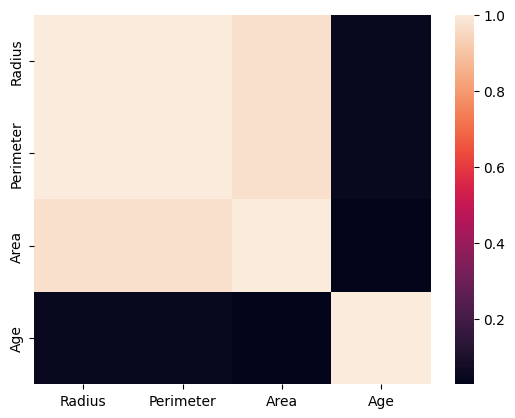

In [43]:
sns.heatmap(corr, cbar=True)
plt.show()

In [29]:
radiusData = pd.read_csv(r"C:\Users\sesa640427\OneDrive - Schneider Electric\Desktop\radius data.csv")

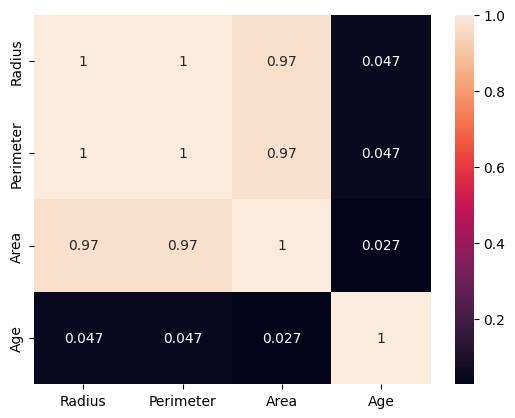

In [34]:
corr = r.corr()
sns.heatmap(corr, cbar=True, annot=True)
plt.show()
# In machine learning, if we see, highly co-related variables in the independent variables (predictors) we keep only one of the highly co-related variables and discard rest of them, because there is no need for
# duplicate data to a machine learning algorithm. By dropping the columns we increase the speed & reduce the complexcity of the algorithm.

[0 1 2 3 4 5 6 7 8 9]


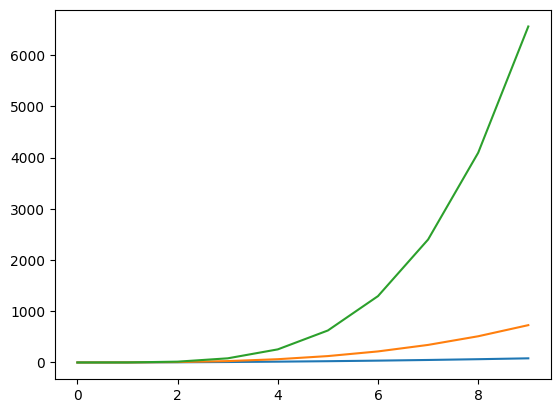

<Figure size 640x480 with 0 Axes>

In [40]:
x = numpy.arange(10)
print(x)
plt.plot(x, x**2)
plt.plot(x, x**3)
plt.plot(x, x**4)
plt.savefig("mygraph.png")
plt.show()
plt.savefig("mygraph2.png")

    

In [44]:
#6 find the variance in each column
g.var()

1
Age                              171.163038
Number of times pregnant           0.249470
Plasma glucose concentration      19.522144
Diastolic blood pressure         192.626710
Triceps skinfold thickness      1201.725233
2-Hour serum insulin             929.627976
Body mass index                  168.388979
Diabetes pedigree function         1.670539
dtype: float64

In [ ]:
#7 find the missing value ratio for every column (missing value ratio means missing value divided by total number of values in a column)


In [ ]:
#8 create logistic regression model (dependent var is Class variable (0 or 1)) - IGNORE
#9 create decision tree model (dependent var is Class variable (0 or 1)) - IGNORE

In [ ]:
#Homework
#Write at least 30 functions in pandas
# Aggregate functions
# groupby functions
# missing value treatment functions
# plotting the graphy from panda's data frame directly without using matplotlib
# learn more about datetime, os libraries
# read more about iterators, generators, decorators, collections library, (yield, ...)
# Use os library to file copy, delete, move, rename, other OS functionalities

